In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Getting Dataset

In [10]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [11]:
from utils import train_loop, test_loop
from pretrained_model import ResNet18_pretrained

num_epochs = 20
lr = 0.001

model = ResNet18_pretrained(model_choice='resnet50', train_last_layer_only= True)

model.to(device= device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

tr_acc, te_acc = [], []
tr_loss, te_loss = [], []

best_acc = 0

for epoch in range(num_epochs):
    train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
    test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

    print('Train Acc epoch {} : {} '.format(epoch, train_correct))
    print('Test Acc epoch {} : {} '.format(epoch, test_correct))

    tr_acc.append(train_correct)
    te_acc.append(test_correct)

    tr_loss.append(train_loss)
    te_loss.append(test_loss)


Using cache found in C:\Users\ianch/.cache\torch\hub\pytorch_vision_main


Train Acc epoch 0 : 0.5729166666666666 
Test Acc epoch 0 : 0.6446 
Train Acc epoch 1 : 0.6611166666666667 
Test Acc epoch 1 : 0.6689 
Train Acc epoch 2 : 0.6928 
Test Acc epoch 2 : 0.6897 
Train Acc epoch 3 : 0.7066 
Test Acc epoch 3 : 0.6989 
Train Acc epoch 4 : 0.7162833333333334 
Test Acc epoch 4 : 0.7049 
Train Acc epoch 5 : 0.7257166666666667 
Test Acc epoch 5 : 0.7183 
Train Acc epoch 6 : 0.7359666666666667 
Test Acc epoch 6 : 0.7185 
Train Acc epoch 7 : 0.7355 
Test Acc epoch 7 : 0.713 
Train Acc epoch 8 : 0.7274833333333334 
Test Acc epoch 8 : 0.7205 
Train Acc epoch 9 : 0.7206833333333333 
Test Acc epoch 9 : 0.6975 
Train Acc epoch 10 : 0.7242333333333333 
Test Acc epoch 10 : 0.7228 
Train Acc epoch 11 : 0.7411666666666666 
Test Acc epoch 11 : 0.7213 
Train Acc epoch 12 : 0.7457833333333334 
Test Acc epoch 12 : 0.7278 
Train Acc epoch 13 : 0.7456333333333334 
Test Acc epoch 13 : 0.7249 
Train Acc epoch 14 : 0.7494833333333333 
Test Acc epoch 14 : 0.727 
Train Acc epoch 15 : 0.

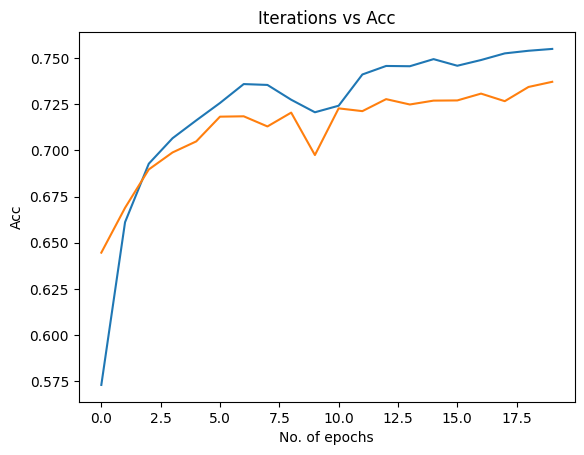

In [12]:
plt.plot(range(num_epochs), tr_acc)
plt.plot(range(num_epochs), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

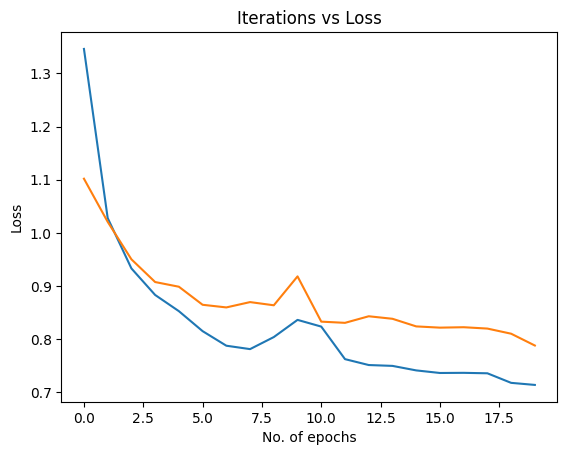

In [13]:
plt.plot(range(num_epochs), tr_loss)
plt.plot(range(num_epochs), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [14]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.7372 | Best Epoch : 19


## Pickle out results and accuracies

In [16]:
import pickle
import os

file_name = 'pretrained_resnet18_freeze_50.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

## Pickle in results and accuracies

In [17]:
file_name = 'pretrained_resnet18_freeze_50.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.6505666666666666, 0.7457333333333334, 0.76725, 0.7789833333333334, 0.78865, 0.7950166666666667, 0.7995, 0.8035666666666667, 0.8070666666666667, 0.8110333333333334, 0.8110833333333334, 0.8133833333333333, 0.8147833333333333, 0.8175, 0.8190333333333333, 0.8208166666666666, 0.8222333333333334, 0.8227, 0.8249666666666666, 0.8251166666666667, 0.8253, 0.827, 0.82855, 0.8287666666666667, 0.8307333333333333, 0.8317333333333333, 0.8313833333333334, 0.8314166666666667, 0.8330666666666666, 0.8330166666666666, 0.8347833333333333, 0.8337833333333333, 0.8356833333333333, 0.8357166666666667, 0.8351666666666666, 0.83615, 0.8373166666666667, 0.8366, 0.8377333333333333, 0.8384833333333334, 0.83935, 0.83955, 0.8399333333333333, 0.8396666666666667, 0.8413333333333334, 0.8423333333333334, 0.8431333333333333, 0.8426166666666667, 0.8437, 0.8438666666666667]
[0.7178, 0.7503, 0.7575, 0.7698, 0.7671, 0.7704, 0.7742, 0.7828, 0.7845, 0.7789, 0.7837, 0.78, 0.7808, 0.7829, 0.7832, 0.7816, 0.7847, 0.7809, 0.7828,